<a href="https://colab.research.google.com/github/shreethaar/The-Magic-of-the-Sorting-Hat/blob/master/Copy_of_hogwarts_house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/A232/Data\ Analytics/project

/content/drive/MyDrive/A232/Data Analytics/project


In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scipy
%pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
df=pd.read_excel('hogwarts_dataset.xlsx',sheet_name='Form Responses 1')
df.to_csv('hogwarts_dataset.csv',index=False)

In [ ]:
df=pd.read_csv('hogwarts_dataset.csv')
df.head()

,Timestamp,"""From whom did you receive this Google Form?""",Personality Traits,Behavioural Traits,Hobbies,GPA,Hometown,Inasis,Co-curriculum Activities,Leadership Experience,Favourite Cuisine,Estimated Household Income,Number of Best Friends,Faculty,Hogwarts House
0,2024-07-03 09:10:49.129,Faridatul,Conscientiousness,Independence,Cerebral,3.43,Kelantan,Inasis TRADEWINDS,ORCHESTRA,Yes,Malay,10000.0,0.0,SOC,Ravenclaw
1,2024-07-02 19:12:43.621,Amsa,Neuroticism,Independence,Cerebral,3.72,Perak,Inasis MAS,NaN,Yes,Western,5000.0,0.0,SQS,Gryffindor
2,2024-07-03 00:36:56.452,Koy Chang Wei,Conscientiousness,Discipline,Cerebral,3.98,Kelantan,Inasis TRADEWINDS,ORCHESTRA,Yes,Malay,12000.0,0.0,SOC,Ravenclaw
3,2024-07-05 12:57:27.617,Muhammad Khairul Inas,Conscientiousness,Discipline,Making-Tinkering,3.30,Perak,Inasis Sime Darby,BRIDGED RELASIS,No,Malay,9000.0,1.0,STML,Hufflepuff
4,2024-07-06 23:37:19.342,Lee Yung jie,Openness,Risk-Taking,Physical,3.30,Negeri Sembilan,Inasis Sime Darby,BADMINTON,No,Chinese,18000.0,1.0,SQS,Ravenclaw


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Timestamp                                       150 non-null    object 
 1   "From whom did you receive this Google Form?"   150 non-null    object 
 2   Personality Traits                              150 non-null    object 
 3   Behavioural Traits                              150 non-null    object 
 4   Hobbies                                         150 non-null    object 
 5   GPA                                             150 non-null    float64
 6   Hometown                                        150 non-null    object 
 7   Inasis                                          150 non-null    object 
 8   Co-curriculum Activities                        134 non-null    object 
 9   Leadership Experience                      

In [ ]:
df=df.drop(df.columns[[0,1]],axis=1)

In [ ]:
df.isnull().sum()

Personality Traits             0
Behavioural Traits             0
Hobbies                        0
GPA                            0
Hometown                       0
Inasis                         0
Co-curriculum Activities      16
Leadership Experience          0
Favourite Cuisine              0
Estimated Household Income     2
Number of Best Friends         1
Faculty                        0
Hogwarts House                 0
dtype: int64

In [ ]:
df.isnull().sum()/len(df)*100

Personality Traits             0.000000
Behavioural Traits             0.000000
Hobbies                        0.000000
GPA                            0.000000
Hometown                       0.000000
Inasis                         0.000000
Co-curriculum Activities      10.666667
Leadership Experience          0.000000
Favourite Cuisine              0.000000
Estimated Household Income     1.333333
Number of Best Friends         0.666667
Faculty                        0.000000
Hogwarts House                 0.000000
dtype: float64

In [ ]:
df['Co-curriculum Activities'].fillna('TAEKWONDO',inplace=True)
df['Estimated Household Income'].fillna(df['Estimated Household Income'].mean(),inplace=True)
df['Number of Best Friends'].replace(np.nan,df['Number of Best Friends'].mean(),inplace=True)

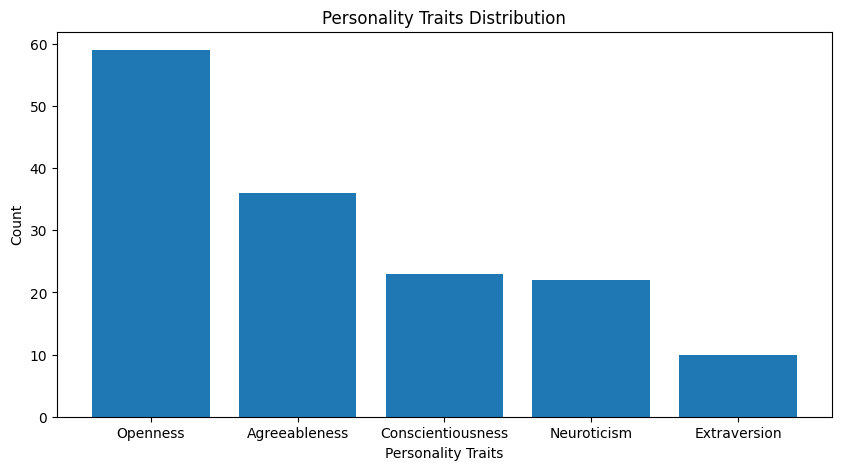

In [ ]:
#Personality Traits Distribution
personality=df['Personality Traits'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(personality.index,personality.values)
plt.title('Personality Traits Distribution')
plt.xlabel('Personality Traits')
plt.ylabel('Count')
plt.show()

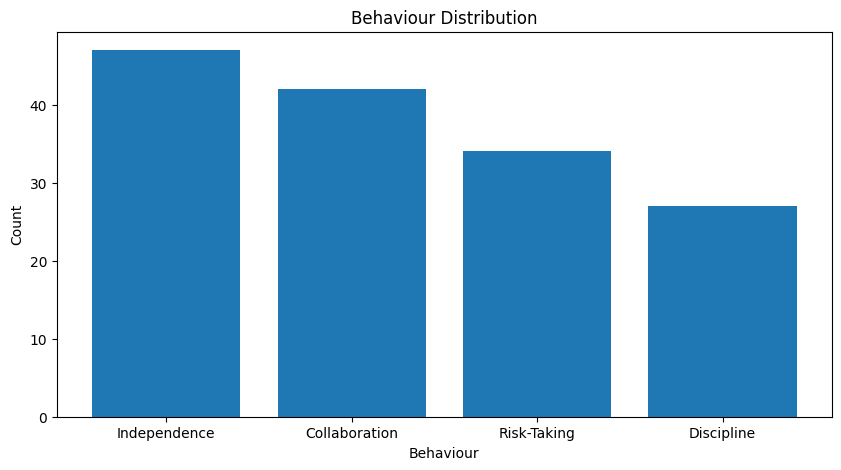

In [ ]:
# Behavioural Traits Distribution
behaviour=df['Behavioural Traits'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(behaviour.index,behaviour.values)
plt.title('Behaviour Distribution')
plt.xlabel('Behaviour')
plt.ylabel('Count')
plt.show()

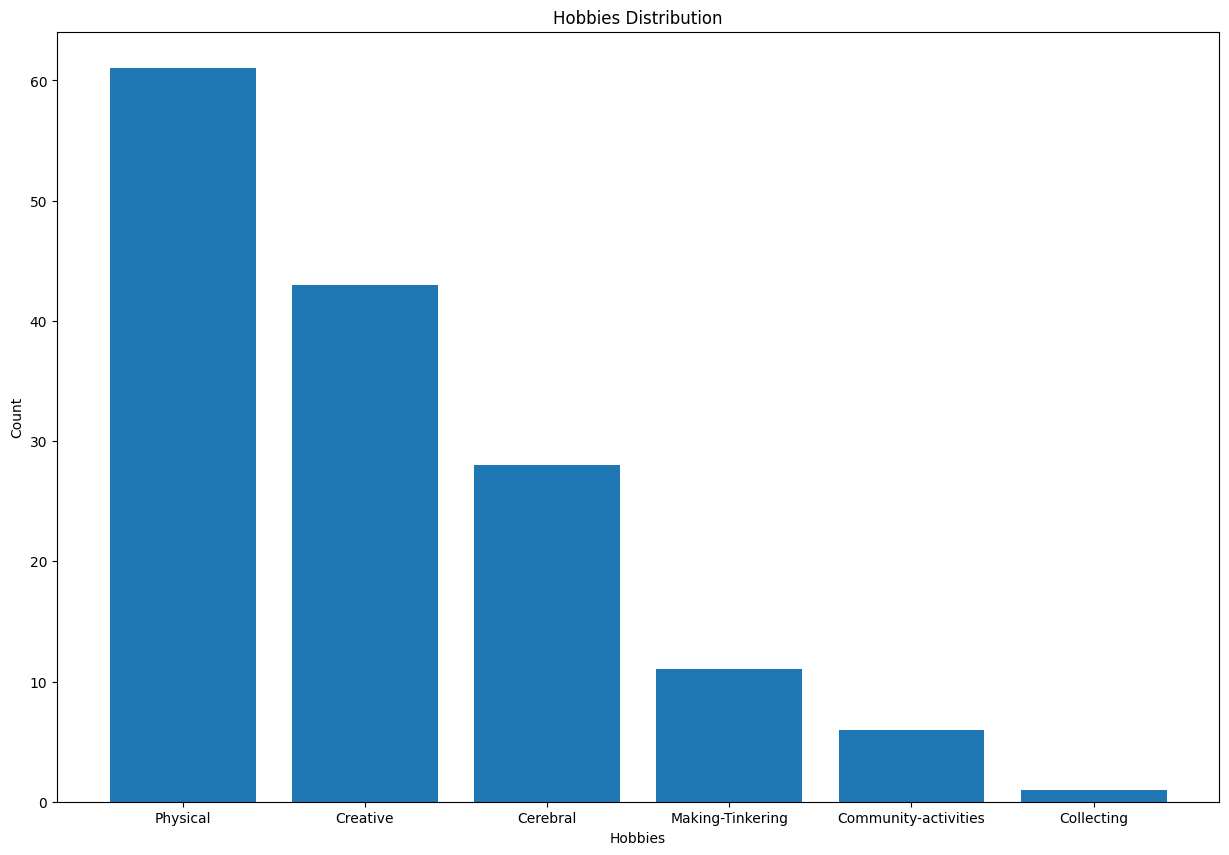

In [ ]:
# Hobbies Distribution
hobbies=df['Hobbies'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(hobbies.index,hobbies.values)
plt.title('Hobbies Distribution')
plt.xlabel('Hobbies')
plt.ylabel('Count')
plt.show()

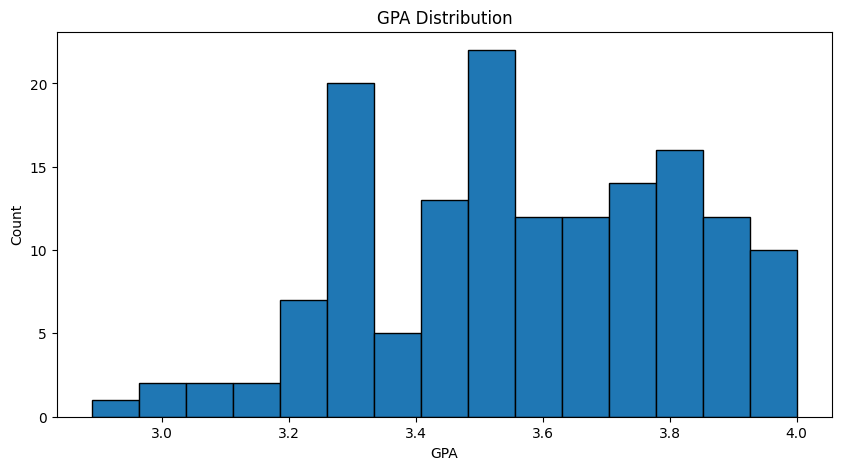

In [ ]:
# GPA distribution
gpa=df['GPA'].value_counts()
plt.figure(figsize=(10, 5))
plt.hist(df['GPA'], bins=15, edgecolor='black')  # Adjust bins as needed
plt.title('GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Count')
plt.show()

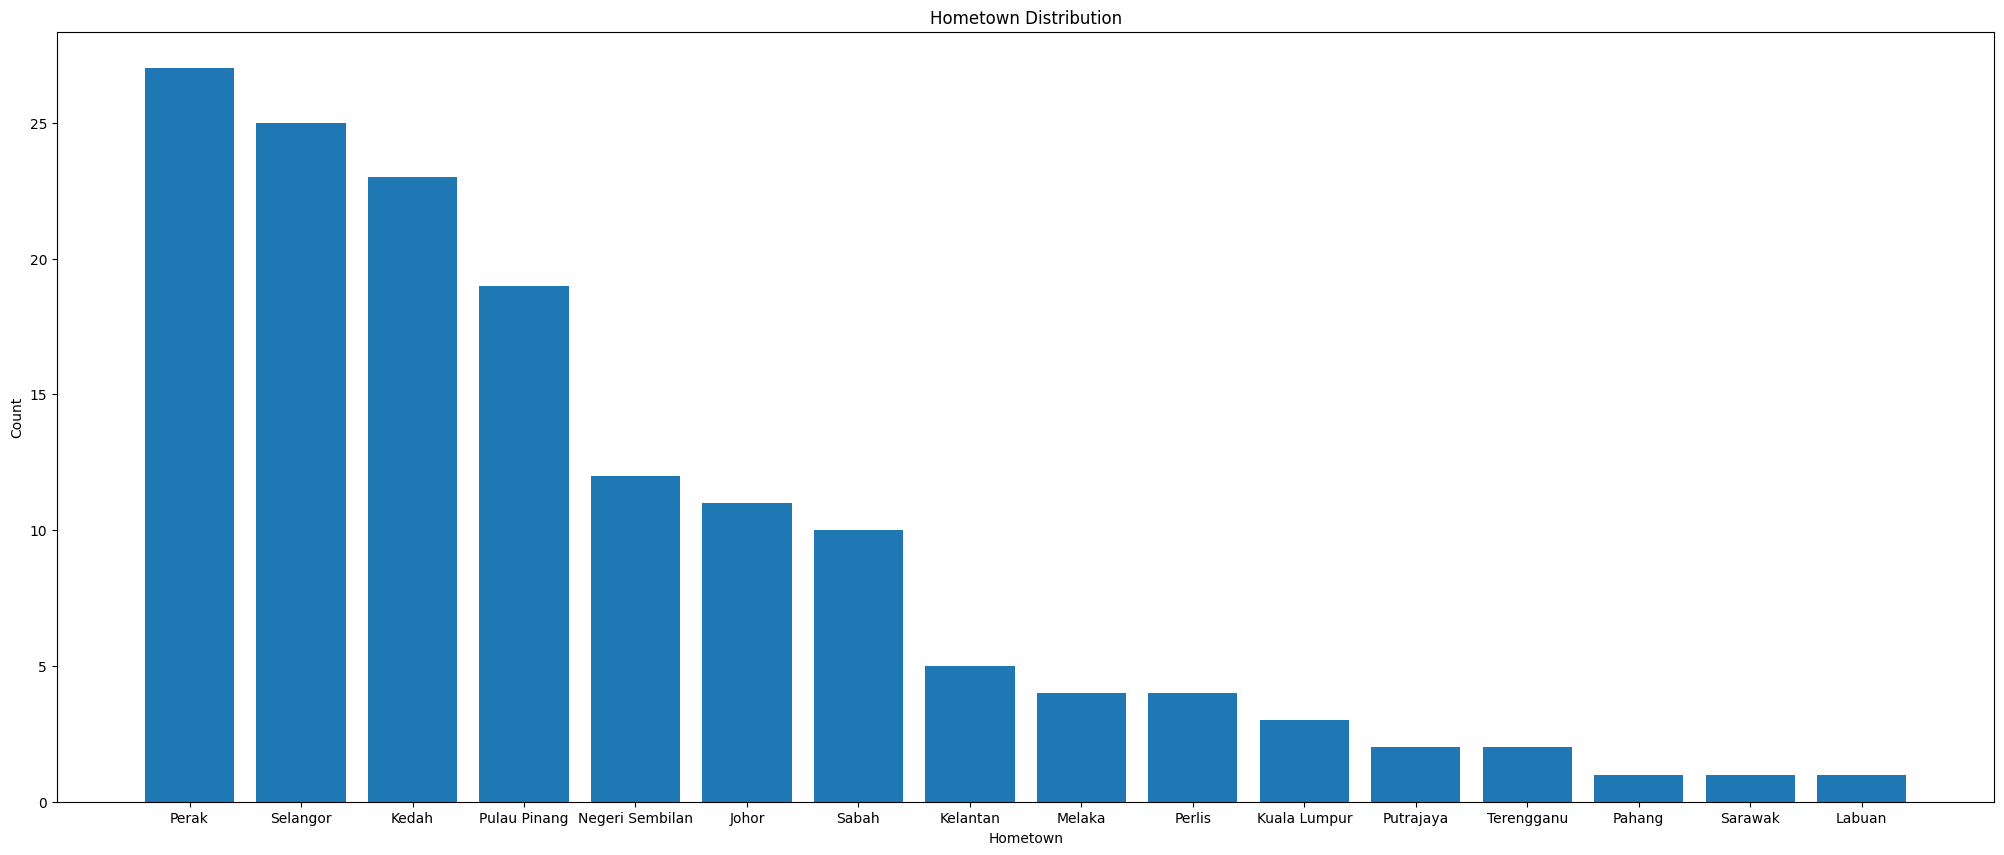

In [ ]:
# Hometown
hometown=df['Hometown'].value_counts()
plt.figure(figsize=(25,10))
plt.bar(hometown.index,hometown.values)
plt.title('Hometown Distribution')
plt.xlabel('Hometown')
plt.ylabel('Count')
plt.show()

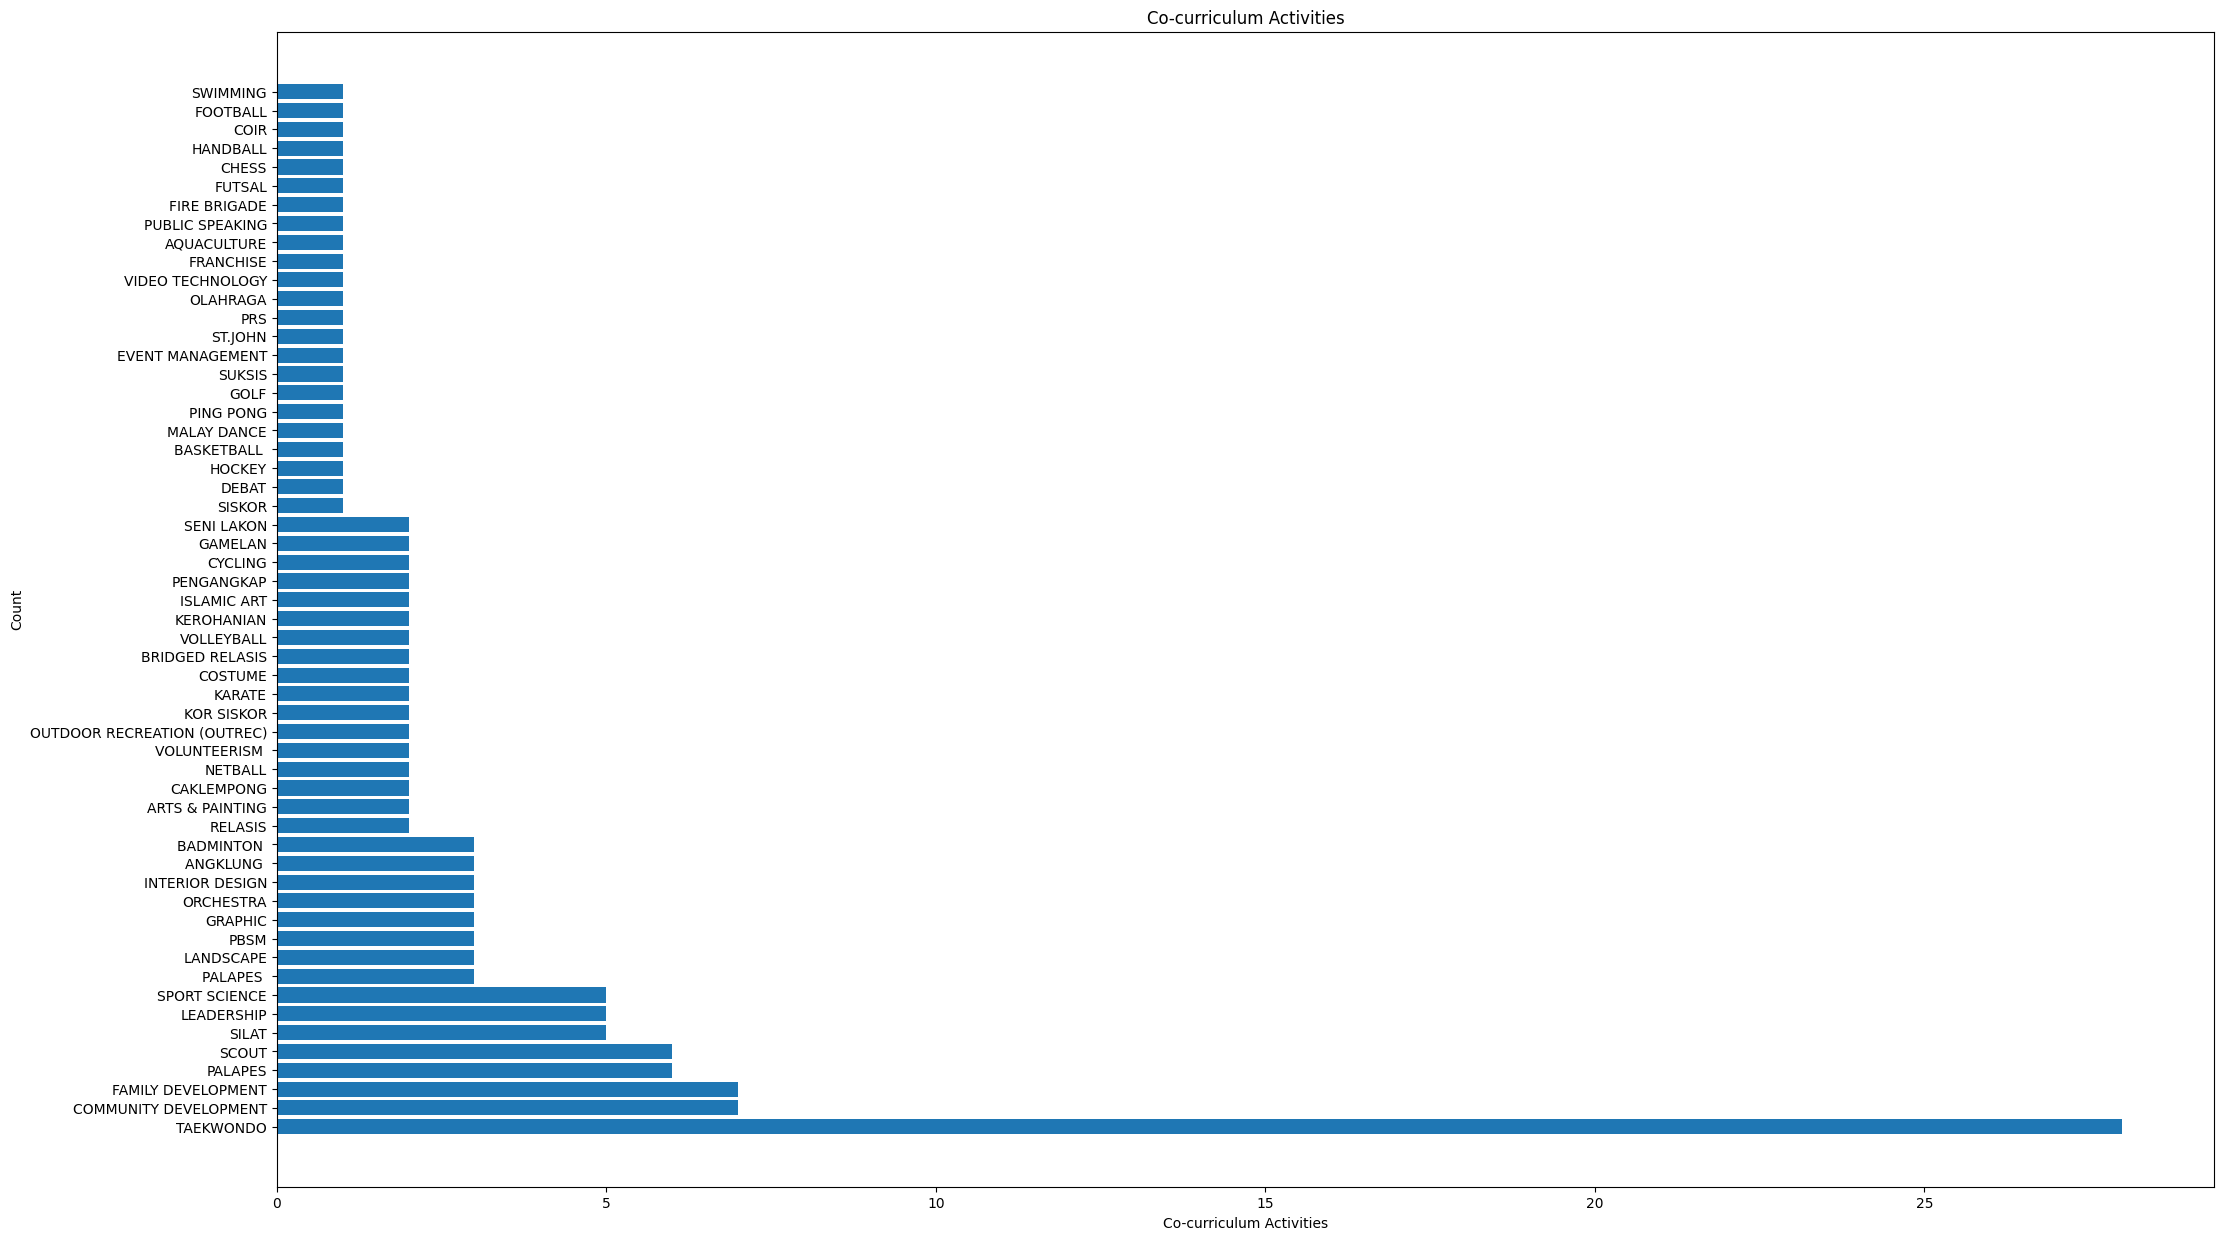

In [ ]:
# Co-curriculum distribution
kok=df['Co-curriculum Activities'].value_counts()
plt.figure(figsize=(25,15))
plt.barh(kok.index,kok.values)
plt.title('Co-curriculum Activities')
plt.xlabel('Co-curriculum Activities')
plt.ylabel('Count')
plt.show()

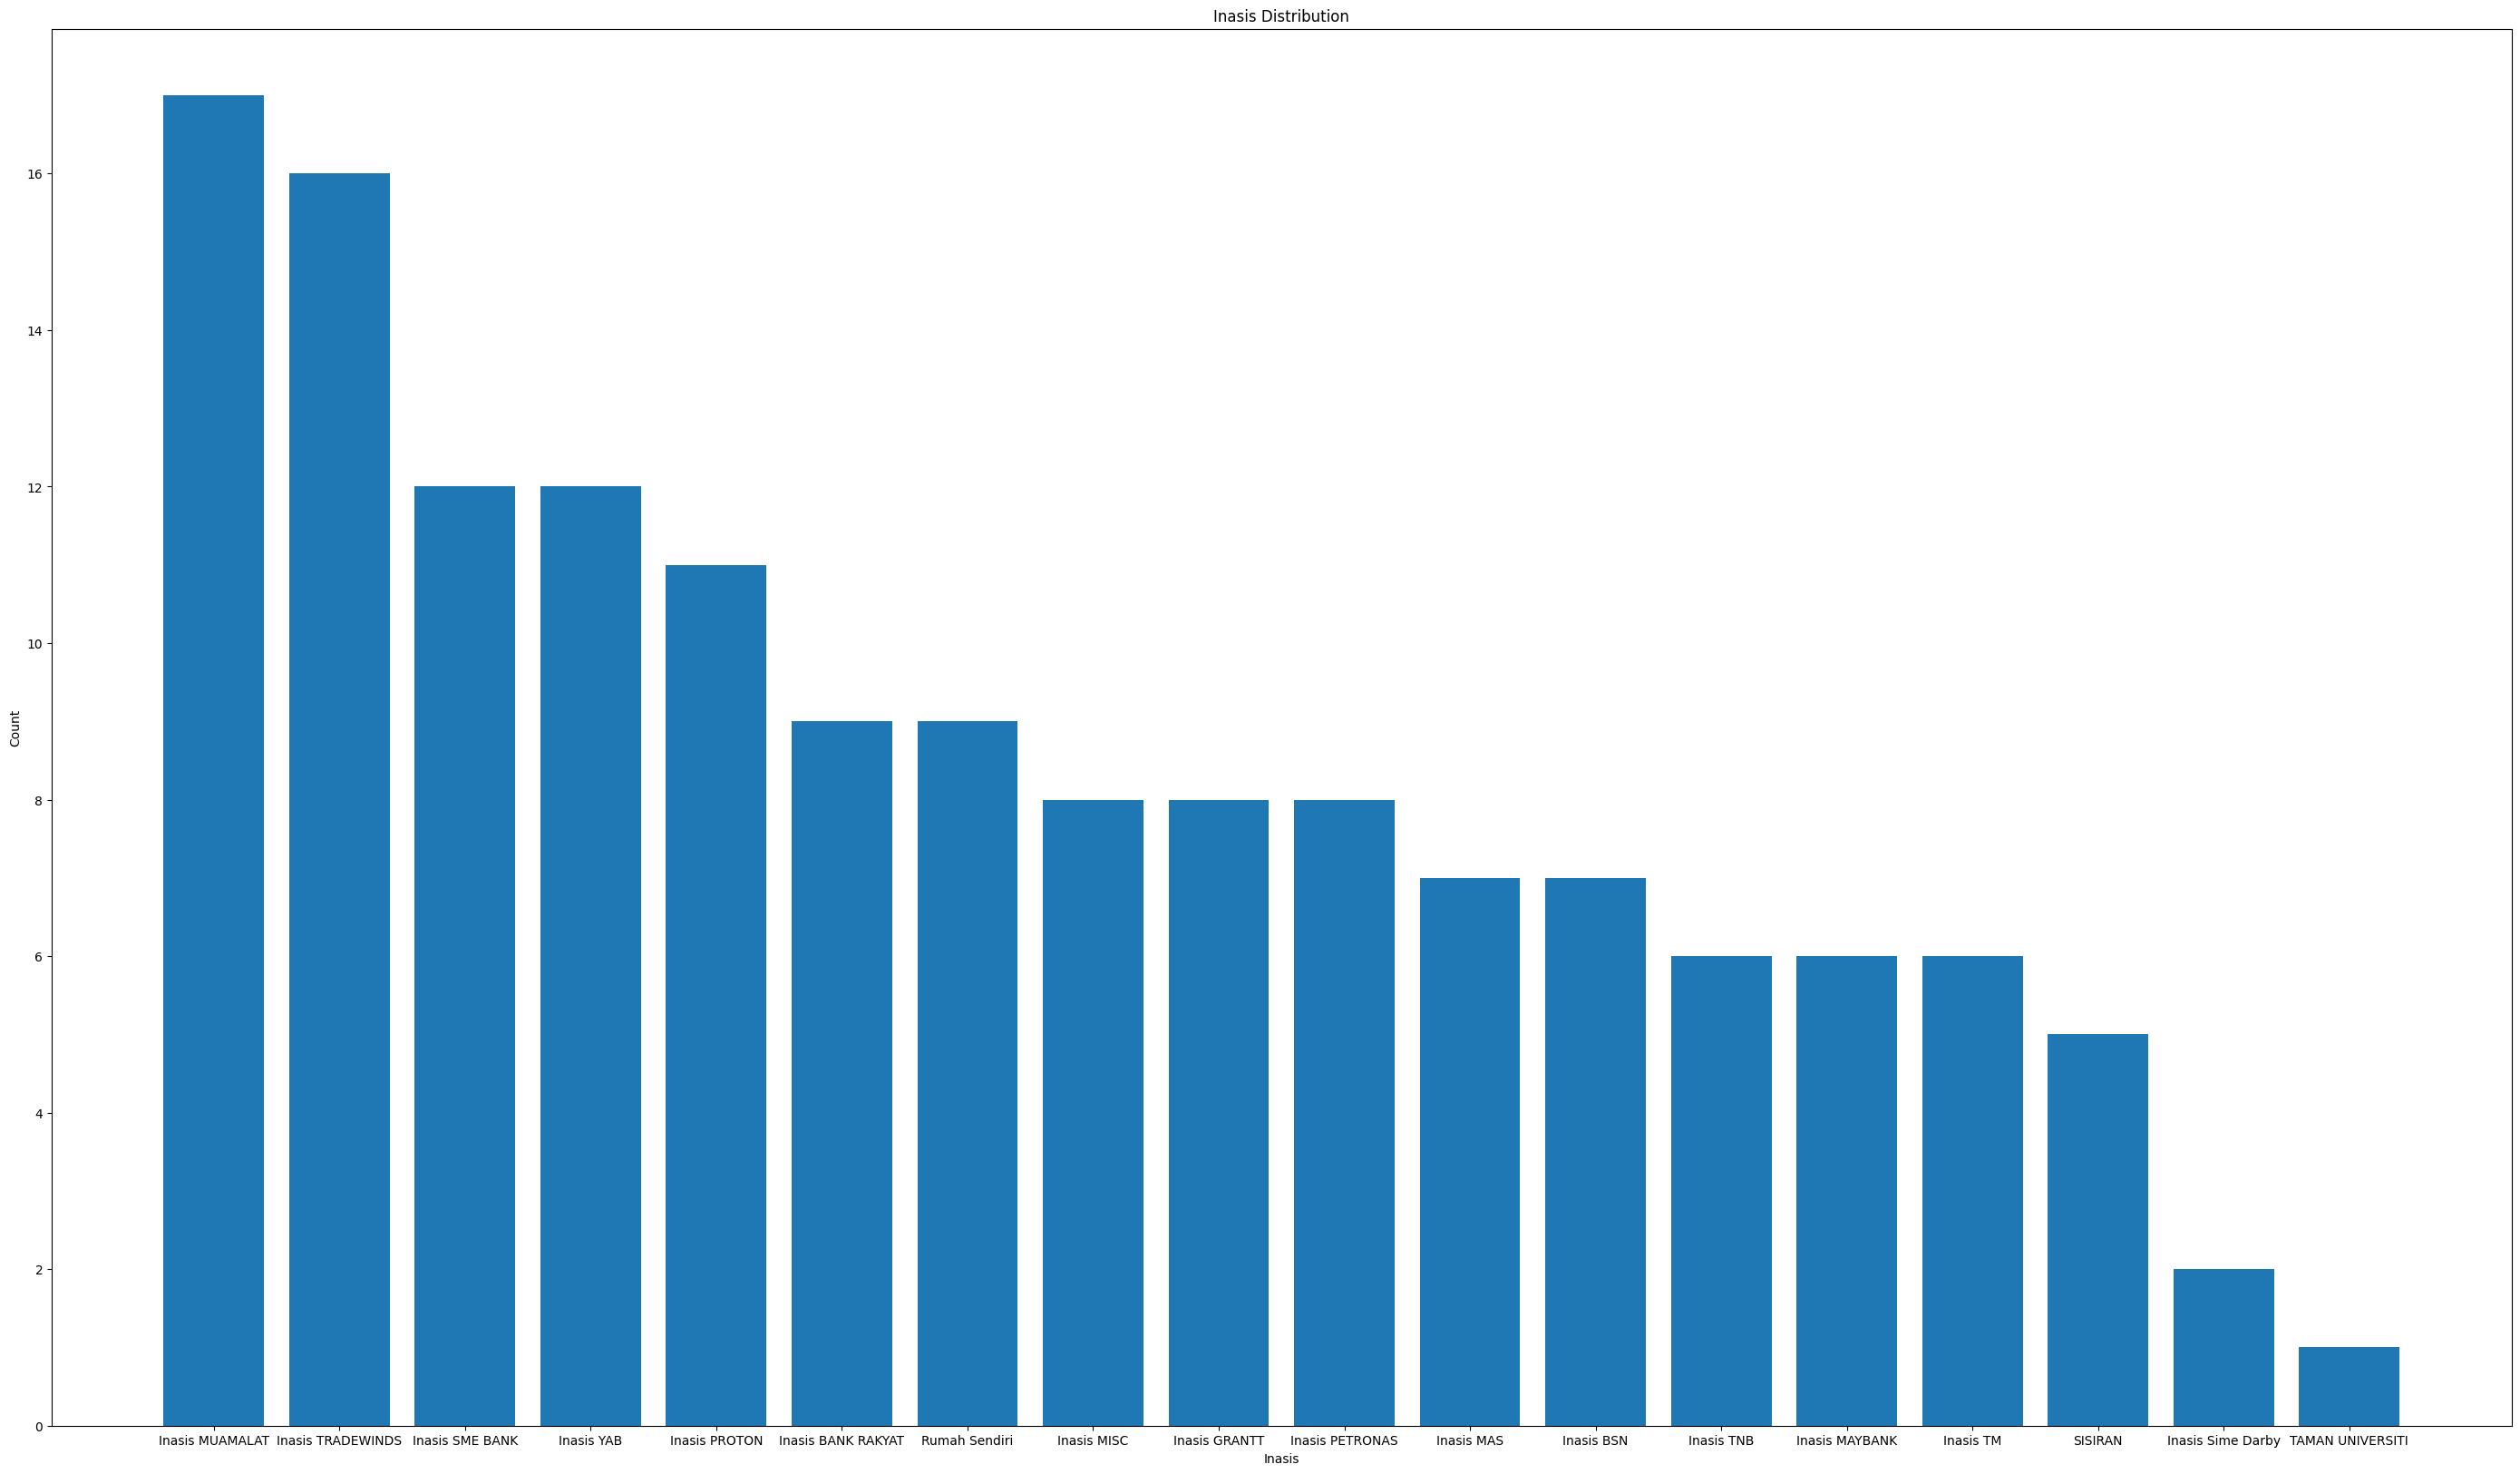

In [ ]:
#Inasis Distribution
inasis=df['Inasis'].value_counts()
plt.figure(figsize=(35,20))
plt.bar(inasis.index,inasis.values)
plt.title('Inasis Distribution')
plt.xlabel('Inasis')
plt.ylabel('Count')
plt.show()

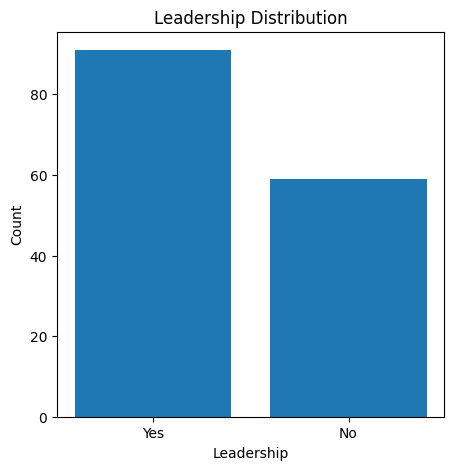

In [ ]:
# Leadership Distribution
leadership=df['Leadership Experience'].value_counts()
plt.figure(figsize=(5,5))
plt.bar(leadership.index,leadership.values)
plt.title('Leadership Distribution')
plt.xlabel('Leadership')
plt.ylabel('Count')
plt.show()

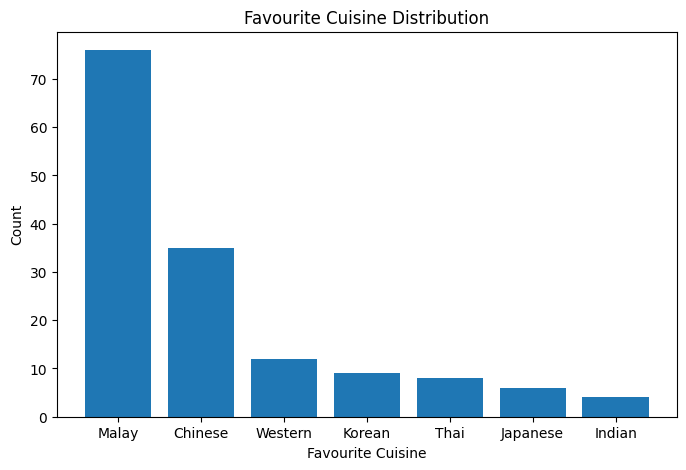

In [ ]:
cuisine=df['Favourite Cuisine'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(cuisine.index,cuisine.values)
plt.title('Favourite Cuisine Distribution')
plt.xlabel('Favourite Cuisine')
plt.ylabel('Count')
plt.show()

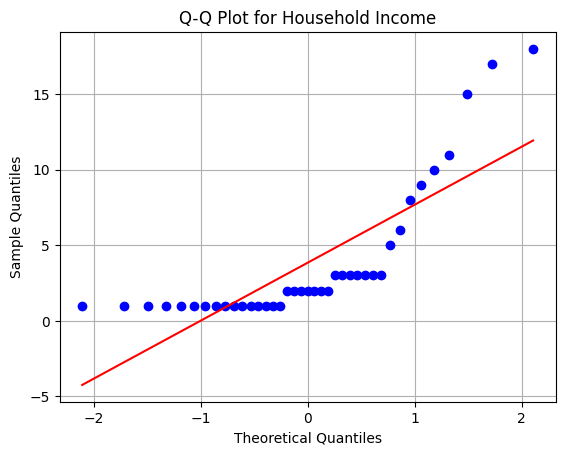

In [ ]:
# estimated family income
income=df['Estimated Household Income'].value_counts()
stats.probplot(income, dist="norm", plot=plt)
plt.title('Q-Q Plot for Household Income')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

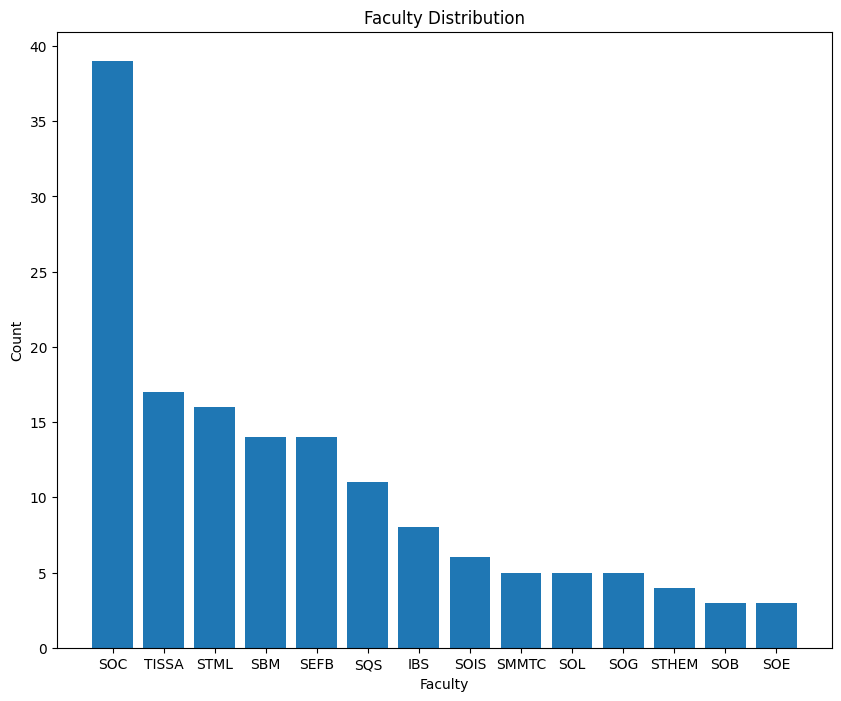

In [ ]:
# faculty distribution
faculty=df['Faculty'].value_counts()
plt.figure(figsize=(10,8))
plt.bar(faculty.index,faculty.values)
plt.title('Faculty Distribution')
plt.xlabel('Faculty')
plt.ylabel('Count')
plt.show()

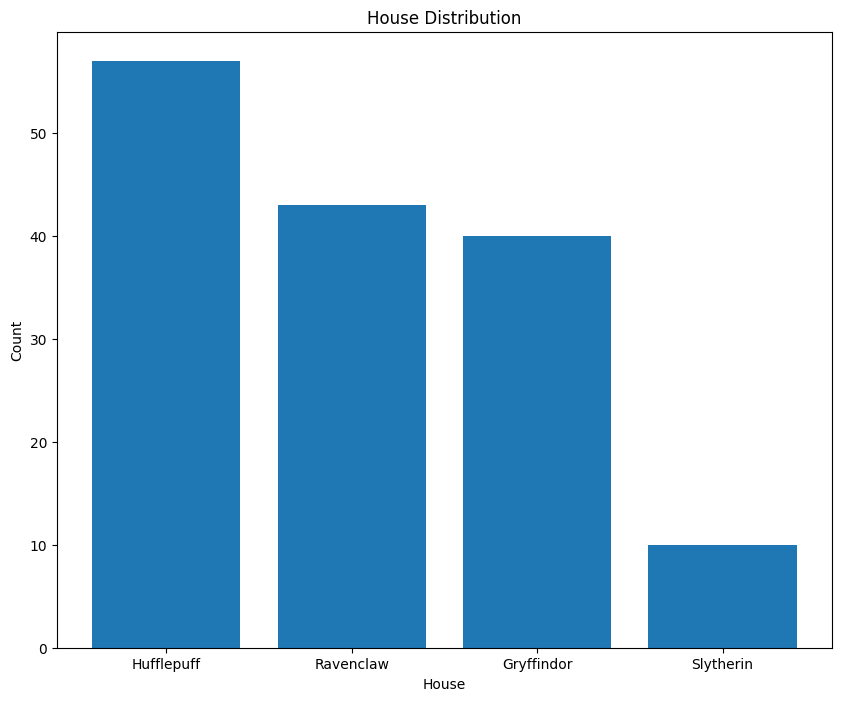

In [ ]:
house_count=df['Hogwarts House'].value_counts()
plt.figure(figsize=(10,8))
plt.bar(house_count.index,house_count.values)
plt.title('House Distribution')
plt.xlabel('House')
plt.ylabel('Count')
plt.show()

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GPA,150.0,3.571267,0.246868,2.89,3.3675,3.56,3.785,4.0
Estimated Household Income,150.0,8221.344595,19068.298153,750.00,2500.0000,4000.00,9000.000,200000.0
Number of Best Friends,150.0,5.885906,11.846632,0.00,3.0000,4.00,6.000,140.0


<Axes: xlabel='GPA', ylabel='Estimated Household Income'>

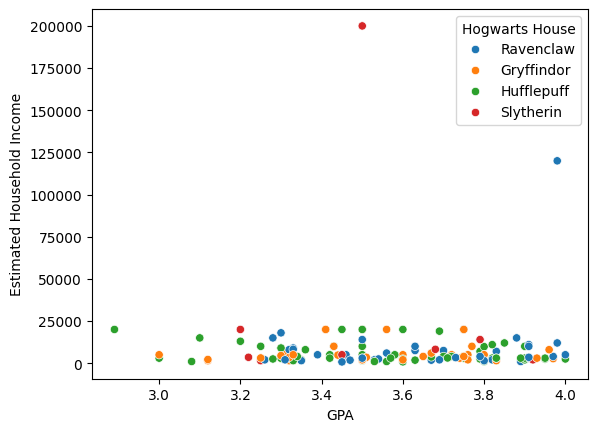

In [ ]:
sns.scatterplot(data=df,x='GPA',y='Estimated Household Income',hue='Hogwarts House')

In [ ]:
# ordinary encoding
ordinal_encoder = OrdinalEncoder()
df['Leadership Experience'] = ordinal_encoder.fit_transform(df[['Leadership Experience']])
df['Leadership Experience'].head()

0    1.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: Leadership Experience, dtype: float64

In [ ]:
ordinal_encoder.categories_

[array(['No', 'Yes'], dtype=object)]

In [ ]:
# mapping for df['Personality Traits']
df['Personality Traits'].unique()

array(['Conscientiousness', 'Neuroticism', 'Openness', 'Extraversion',
       'Agreeableness'], dtype=object)

In [ ]:
map_dict={
    'Openness':1,
    'Conscientiousness':2,
    'Extraversion':3,
    'Agreeableness':4,
    'Neuroticism':5
}
df['Personality Traits']=df['Personality Traits'].map(map_dict)
df.head()

,Personality Traits,Behavioural Traits,Hobbies,GPA,Hometown,Inasis,Co-curriculum Activities,Leadership Experience,Favourite Cuisine,Estimated Household Income,Number of Best Friends,Faculty,Hogwarts House
0,2,Independence,Cerebral,3.43,Kelantan,Inasis TRADEWINDS,ORCHESTRA,1.0,Malay,10000.0,0.0,SOC,Ravenclaw
1,5,Independence,Cerebral,3.72,Perak,Inasis MAS,TAEKWONDO,1.0,Western,5000.0,0.0,SQS,Gryffindor
2,2,Discipline,Cerebral,3.98,Kelantan,Inasis TRADEWINDS,ORCHESTRA,1.0,Malay,12000.0,0.0,SOC,Ravenclaw
3,2,Discipline,Making-Tinkering,3.30,Perak,Inasis Sime Darby,BRIDGED RELASIS,0.0,Malay,9000.0,1.0,STML,Hufflepuff
4,1,Risk-Taking,Physical,3.30,Negeri Sembilan,Inasis Sime Darby,BADMINTON,0.0,Chinese,18000.0,1.0,SQS,Ravenclaw


In [ ]:
# mapping for df['Behavioural Traits']
df['Behavioural Traits'].unique()

array(['Independence', 'Discipline', 'Risk-Taking', 'Collaboration'],
      dtype=object)

In [ ]:
map_dict={
    'Independence': 1,
    'Collaboration': 2,
    'Discipline': 3,
    'Risk-Taking': 4
}
df['Behavioural Traits']=df['Behavioural Traits'].map(map_dict)
df.head()

,Personality Traits,Behavioural Traits,Hobbies,GPA,Hometown,Inasis,Co-curriculum Activities,Leadership Experience,Favourite Cuisine,Estimated Household Income,Number of Best Friends,Faculty,Hogwarts House
0,2,1,Cerebral,3.43,Kelantan,Inasis TRADEWINDS,ORCHESTRA,1.0,Malay,10000.0,0.0,SOC,Ravenclaw
1,5,1,Cerebral,3.72,Perak,Inasis MAS,TAEKWONDO,1.0,Western,5000.0,0.0,SQS,Gryffindor
2,2,3,Cerebral,3.98,Kelantan,Inasis TRADEWINDS,ORCHESTRA,1.0,Malay,12000.0,0.0,SOC,Ravenclaw
3,2,3,Making-Tinkering,3.30,Perak,Inasis Sime Darby,BRIDGED RELASIS,0.0,Malay,9000.0,1.0,STML,Hufflepuff
4,1,4,Physical,3.30,Negeri Sembilan,Inasis Sime Darby,BADMINTON,0.0,Chinese,18000.0,1.0,SQS,Ravenclaw


In [ ]:
# mapping for df['Hobbies']
df['Hobbies'].unique()

array(['Cerebral', 'Making-Tinkering', 'Physical', 'Creative',
       'Community-activities', 'Collecting'], dtype=object)

In [ ]:
map_dict={
    'Physical':1,
    'Cerebral':2,
    'Community-activities':3,
    'Making-Tinkering': 4,
    'Creative': 5,
    'Collecting': 6
}
df['Hobbies']=df['Hobbies'].map(map_dict)
df.head()

,Personality Traits,Behavioural Traits,Hobbies,GPA,Hometown,Inasis,Co-curriculum Activities,Leadership Experience,Favourite Cuisine,Estimated Household Income,Number of Best Friends,Faculty,Hogwarts House
0,2,1,2,3.43,Kelantan,Inasis TRADEWINDS,ORCHESTRA,1.0,Malay,10000.0,0.0,SOC,Ravenclaw
1,5,1,2,3.72,Perak,Inasis MAS,TAEKWONDO,1.0,Western,5000.0,0.0,SQS,Gryffindor
2,2,3,2,3.98,Kelantan,Inasis TRADEWINDS,ORCHESTRA,1.0,Malay,12000.0,0.0,SOC,Ravenclaw
3,2,3,4,3.30,Perak,Inasis Sime Darby,BRIDGED RELASIS,0.0,Malay,9000.0,1.0,STML,Hufflepuff
4,1,4,1,3.30,Negeri Sembilan,Inasis Sime Darby,BADMINTON,0.0,Chinese,18000.0,1.0,SQS,Ravenclaw


In [ ]:
# mapping for df['Hometown']
df['Hometown'].unique()

array(['Kelantan', 'Perak', 'Negeri Sembilan', 'Selangor', 'Kedah',
       'Putrajaya', 'Pulau Pinang', 'Kuala Lumpur', 'Melaka', 'Sabah',
       'Johor', 'Pahang', 'Perlis', 'Sarawak', 'Terengganu', 'Labuan'],
      dtype=object)

In [ ]:
map_dict = {
    'Sabah': 'Borneo',
    'Sarawak': 'Borneo',
    'Kuala Lumpur': 'Central',
    'Selangor': 'Central',
    'Perak': 'North',
    'Pahang': 'East',
    'Kedah': 'North',
    'Negeri Sembilan': 'Central',
    'Kelantan': 'East',
    'Perlis': 'North',
    'Pulau Pinang': 'North',
    'Melaka': 'South',
    'Terengganu': 'East',
    'Johor': 'South',
    'Labuan': 'Borneo',
    'Putrajaya': 'Central'
}

df['Hometown'] = df['Hometown'].map(map_dict)
df.head()

,Personality Traits,Behavioural Traits,Hobbies,GPA,Hometown,Inasis,Co-curriculum Activities,Leadership Experience,Favourite Cuisine,Estimated Household Income,Number of Best Friends,Faculty,Hogwarts House
0,2,1,2,3.43,East,Inasis TRADEWINDS,ORCHESTRA,1.0,Malay,10000.0,0.0,SOC,Ravenclaw
1,5,1,2,3.72,North,Inasis MAS,TAEKWONDO,1.0,Western,5000.0,0.0,SQS,Gryffindor
2,2,3,2,3.98,East,Inasis TRADEWINDS,ORCHESTRA,1.0,Malay,12000.0,0.0,SOC,Ravenclaw
3,2,3,4,3.30,North,Inasis Sime Darby,BRIDGED RELASIS,0.0,Malay,9000.0,1.0,STML,Hufflepuff
4,1,4,1,3.30,Central,Inasis Sime Darby,BADMINTON,0.0,Chinese,18000.0,1.0,SQS,Ravenclaw


In [ ]:
df['Hometown'].unique()

array(['East', 'North', 'Central', 'South', 'Borneo'], dtype=object)

In [ ]:
map_dict={
    'Borneo':1,
    'Central':2,
    'East':3,
    'North':4,
    'South':5
}
df['Hometown']=df['Hometown'].map(map_dict)
df.head()

,Personality Traits,Behavioural Traits,Hobbies,GPA,Hometown,Inasis,Co-curriculum Activities,Leadership Experience,Favourite Cuisine,Estimated Household Income,Number of Best Friends,Faculty,Hogwarts House
0,2,1,2,3.43,3,Inasis TRADEWINDS,ORCHESTRA,1.0,Malay,10000.0,0.0,SOC,Ravenclaw
1,5,1,2,3.72,4,Inasis MAS,TAEKWONDO,1.0,Western,5000.0,0.0,SQS,Gryffindor
2,2,3,2,3.98,3,Inasis TRADEWINDS,ORCHESTRA,1.0,Malay,12000.0,0.0,SOC,Ravenclaw
3,2,3,4,3.30,4,Inasis Sime Darby,BRIDGED RELASIS,0.0,Malay,9000.0,1.0,STML,Hufflepuff
4,1,4,1,3.30,2,Inasis Sime Darby,BADMINTON,0.0,Chinese,18000.0,1.0,SQS,Ravenclaw


In [ ]:
df['Inasis'].unique()

array(['Inasis TRADEWINDS', 'Inasis MAS', 'Inasis Sime Darby',
       'Inasis TNB', 'Inasis MAYBANK', 'Inasis MISC', 'Inasis PROTON',
       'Inasis SME BANK', 'Inasis GRANTT', 'Inasis MUAMALAT',
       'Inasis PETRONAS', 'SISIRAN', 'Inasis BANK RAKYAT', 'Inasis YAB',
       'Rumah Sendiri', 'Inasis BSN', 'Inasis TM', 'TAMAN UNIVERSITI'],
      dtype=object)

In [ ]:
map_dict = {
    'Inasis TM':1,
    'Inasis BANK RAKYAT':2,
    'Inasis MAS': 3,
    'Rumah Sendiri': 4,
    'Inasis TRADEWINDS': 5,
    'SISIRAN': 6,
    'Inasis PETRONAS': 7,
    'Inasis MUAMALAT': 8,
    'Inasis TNB': 9,
    'Inasis BSN':10,
    'Inasis GRANTT':11,
    'Inasis PROTON':12,
    'Inasis MISC': 13,
    'Inasis SME BANK':14,
    'Inasis YAB': 15,
    'Inasis MAYBANK': 16,
    'TAMAN UNIVERSITI': 17,
    'Inasis Sime Darby':18
}
df['Inasis']=df['Inasis'].map(map_dict)
df.head()

,Personality Traits,Behavioural Traits,Hobbies,GPA,Hometown,Inasis,Co-curriculum Activities,Leadership Experience,Favourite Cuisine,Estimated Household Income,Number of Best Friends,Faculty,Hogwarts House
0,2,1,2,3.43,3,5,ORCHESTRA,1.0,Malay,10000.0,0.0,SOC,Ravenclaw
1,5,1,2,3.72,4,3,TAEKWONDO,1.0,Western,5000.0,0.0,SQS,Gryffindor
2,2,3,2,3.98,3,5,ORCHESTRA,1.0,Malay,12000.0,0.0,SOC,Ravenclaw
3,2,3,4,3.30,4,18,BRIDGED RELASIS,0.0,Malay,9000.0,1.0,STML,Hufflepuff
4,1,4,1,3.30,2,18,BADMINTON,0.0,Chinese,18000.0,1.0,SQS,Ravenclaw


In [ ]:
df['Co-curriculum Activities'].unique()

array(['ORCHESTRA', 'TAEKWONDO', 'BRIDGED RELASIS', 'BADMINTON ',
       'SENI LAKON', 'FOOTBALL', 'COIR', 'GAMELAN', 'ANGKLUNG ',
       'CYCLING', 'PENGANGKAP', 'ISLAMIC ART', 'PALAPES ', 'GRAPHIC',
       'LEADERSHIP', 'SILAT', 'FAMILY DEVELOPMENT', 'KEROHANIAN', 'PBSM',
       'VOLLEYBALL', 'HANDBALL', 'CHESS', 'PALAPES', 'FUTSAL',
       'LANDSCAPE', 'FIRE BRIGADE', 'PUBLIC SPEAKING',
       'OUTDOOR RECREATION (OUTREC)', 'ST.JOHN', 'CAKLEMPONG',
       'KOR SISKOR', 'INTERIOR DESIGN', 'AQUACULTURE', 'FRANCHISE',
       'ARTS & PAINTING', 'SCOUT', 'VIDEO TECHNOLOGY', 'VOLUNTEERISM ',
       'OLAHRAGA', 'COMMUNITY DEVELOPMENT', 'PRS', 'KARATE', 'COSTUME',
       'DEBAT', 'HOCKEY', 'NETBALL', 'BASKETBALL ', 'RELASIS', 'SUKSIS',
       'PING PONG', 'SPORT SCIENCE', 'EVENT MANAGEMENT', 'GOLF',
       'MALAY DANCE', 'SISKOR', 'SWIMMING'], dtype=object)

In [ ]:
# label encoder for kok
label_encoder = LabelEncoder()
df['Co-curriculum Activities'] = label_encoder.fit_transform(df['Co-curriculum Activities'])
df['Co-curriculum Activities'].head()

0    34
1    52
2    34
3     5
4     3
Name: Co-curriculum Activities, dtype: int64

In [ ]:
df['Favourite Cuisine'].unique()

array(['Malay', 'Western', 'Chinese', 'Korean', 'Thai', 'Indian',
       'Japanese'], dtype=object)

In [ ]:
# label encoder for favourite cuisine
label_encoder = LabelEncoder()
df['Favourite Cuisine'] = label_encoder.fit_transform(df['Favourite Cuisine'])
df['Favourite Cuisine'].head()

0    4
1    6
2    4
3    4
4    0
Name: Favourite Cuisine, dtype: int64

In [ ]:
# label encoder for faculty
label_encoder=LabelEncoder()
df['Faculty']=label_encoder.fit_transform(df['Faculty'])
df['Faculty'].head()

0     5
1    10
2     5
3    12
4    10
Name: Faculty, dtype: int64

In [ ]:
df['Hogwarts House'].unique()

array(['Ravenclaw', 'Gryffindor', 'Hufflepuff', 'Slytherin'], dtype=object)

In [ ]:
map_dict = {
    'Ravenclaw': 1,
    'Slytherin': 2,
    'Gryffindor': 3,
    'Hufflepuff': 4
}
df['Hogwarts House'] = df['Hogwarts House'].map(map_dict)
df.head()

,Personality Traits,Behavioural Traits,Hobbies,GPA,Hometown,Inasis,Co-curriculum Activities,Leadership Experience,Favourite Cuisine,Estimated Household Income,Number of Best Friends,Faculty,Hogwarts House
0,2,1,2,3.43,3,5,34,1.0,4,10000.0,0.0,5,1
1,5,1,2,3.72,4,3,52,1.0,6,5000.0,0.0,10,3
2,2,3,2,3.98,3,5,34,1.0,4,12000.0,0.0,5,1
3,2,3,4,3.30,4,18,5,0.0,4,9000.0,1.0,12,4
4,1,4,1,3.30,2,18,3,0.0,0,18000.0,1.0,10,1


In [ ]:
# standardization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_cols=['GPA','Estimated Household Income','Number of Best Friends']
df[num_cols]=scaler.fit_transform(df[num_cols])

In [ ]:
X = df.drop("Hogwarts House", axis=1)
y = pd.DataFrame(df["Hogwarts House"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((105, 12), (45, 12))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Personality Traits          150 non-null    int64  
 1   Behavioural Traits          150 non-null    int64  
 2   Hobbies                     150 non-null    int64  
 3   GPA                         150 non-null    float64
 4   Hometown                    150 non-null    int64  
 5   Inasis                      150 non-null    int64  
 6   Co-curriculum Activities    150 non-null    int64  
 7   Leadership Experience       150 non-null    float64
 8   Favourite Cuisine           150 non-null    int64  
 9   Estimated Household Income  150 non-null    float64
 10  Number of Best Friends      150 non-null    float64
 11  Faculty                     150 non-null    int64  
 12  Hogwarts House              150 non-null    int64  
dtypes: float64(4), int64(9)
memory usag

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=3,min_samples_leaf=5)
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [ ]:
y_pred_gini=clf_gini.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.2889


In [ ]:
# univariate selection
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures=SelectKBest(score_func=chi2,k=5).fit(X,y)
dfscores=pd.DataFrame(bestfeatures.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']
print(featureScores.nlargest(5,'Score'))

                        Specs      Score
2                     Hobbies  10.567499
5                      Inasis   4.939018
6    Co-curriculum Activities   4.171441
0          Personality Traits   3.179375
9  Estimated Household Income   2.522301


In [ ]:
X_train_selected=bestfeatures.transform(X_train)
X_test_selected=bestfeatures.transform(X_test)
clf_gini=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=3,min_samples_leaf=5)
clf_gini.fit(X_train_selected,y_train)
y_pred_gini=clf_gini.predict(X_test_selected)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.3778


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures=SelectKBest(score_func=chi2,k=5).fit(X,y)
dfscores=pd.DataFrame(bestfeatures.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']
print(featureScores.nlargest(7,'Score'))

                        Specs      Score
2                     Hobbies  10.567499
5                      Inasis   4.939018
6    Co-curriculum Activities   4.171441
0          Personality Traits   3.179375
9  Estimated Household Income   2.522301
7       Leadership Experience   1.958021
4                    Hometown   1.844834
